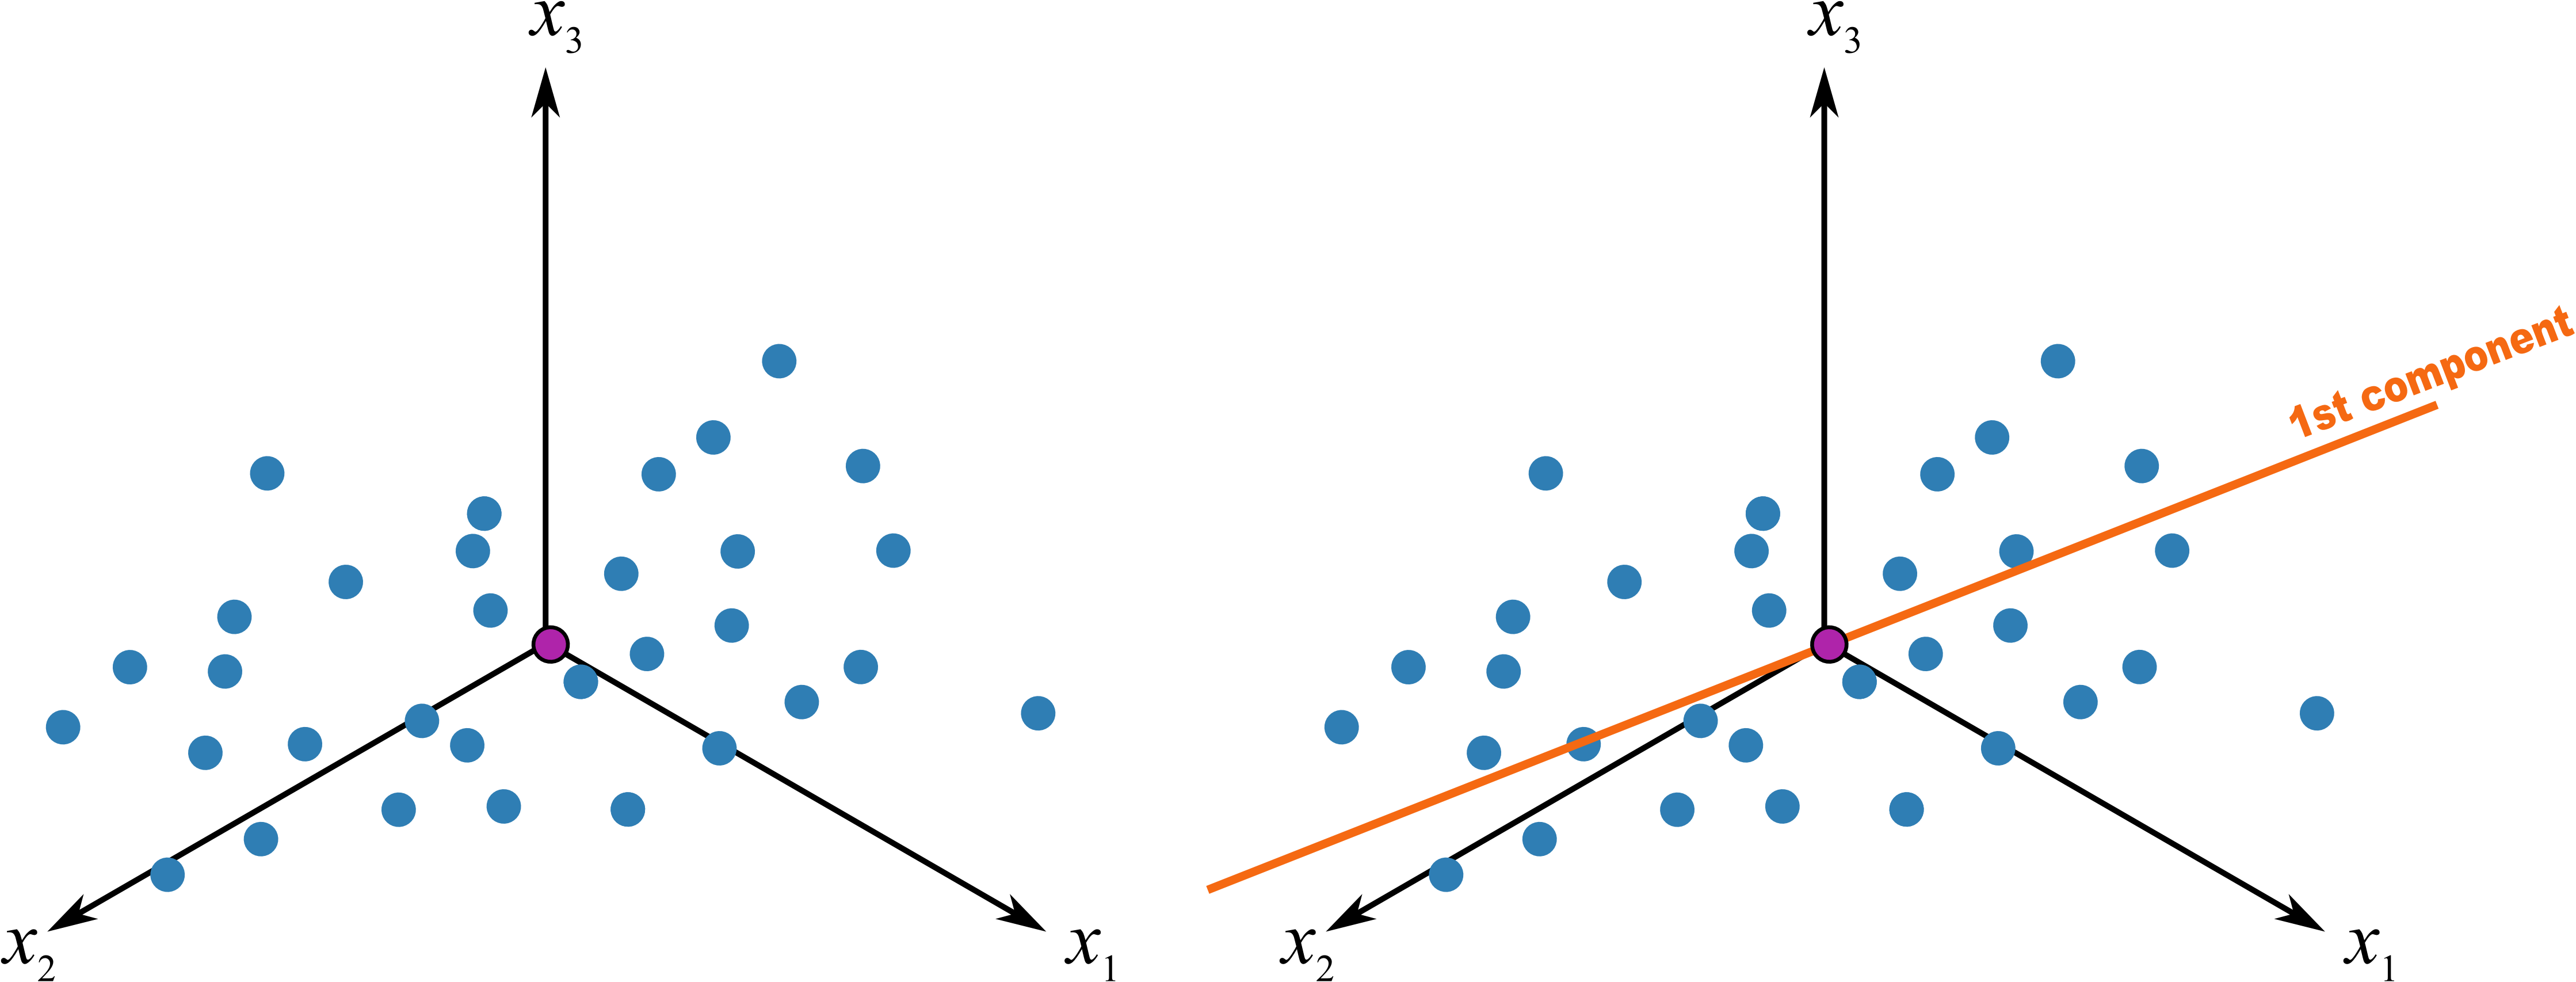

<br/>

## **Main components of this kernel:**
1. What are PCA and SVD  
2. Linear Regression without applying PCA and SVD 
3. Linear Regression with PCA  
4. Linear Regression with SVD  
5. The impact of PCA and SVD on the model accuracy  
6. Reasons of why sometimes PCA and SVD doesn't work well  
7. Cautions while applying Dimensionality Reduction

<br/>
<br/>

## 1. What are PCA and SVD?  
PCA stands for **Principle Component Analysis** and **SVD for Singular Value Decomposition**. They are both used to reduce the dimensionality of a dataset without changing the model accuracy in a large scale.  
Working with too many features are always a tedious job. And when it comes with a lot of features which even don't have any importance to the model, it becomes meaningless to move forward with them. And the features which are correlated with one another more than the terget variable, it brings multicollinearity and dimension curse. And here comes up **Dimensionality Reduction** which actually chooses the best features for the model.  

There are a lot of methods to execute Dimensionality Reduction such as **PCA**, **SVD** and **REF**. But in this kernel, I will discuss about only PCA and SVD.

<br/>
<br/>

### Let me first import some necessary modules and load the dataset
We will  use the famous **Boston Housing Price** dataset from Scikit-Learn.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA, TruncatedSVD

In [33]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [34]:
unscaled_X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target)

In [35]:
unscaled_X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [36]:
y.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [37]:
unscaled_X.shape

(506, 13)

In [38]:
unscaled_X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [39]:
y.isnull().sum()

0    0
dtype: int64

### Scaling the features
I will talk about it later. But for now, just remember that it carries a lot of importance in Dimensionality Reduction.

In [40]:
scaler = StandardScaler()
scaler.fit(unscaled_X)
X = scaler.transform(unscaled_X)

<br/>
<br/>

# 2. Linear Regression Model without Dimensionality Reduction

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [42]:
lr = LinearRegression()

# Train the model
model = lr.fit(X_train, y_train)

# Prediction
y_pred =  lr.predict(X_test)

# Accuracy Score
lr.score(X_test, y_test).round(4)

0.7263

**I got about 72% accuracy with all the features.  
Now let's see what Dimensionality Reduction can do for us.**

<br/>
<br/>

# 3. Linear Regression Model with PCA

In [43]:
pca = PCA(n_components = 10, whiten = True)
pca.fit(X)
pca_X = pca.transform(X)

In [44]:
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(pca_X, y, test_size = 0.2, random_state = 4)

In [45]:
pca_lr = LinearRegression()

# Train the model
pca_model = pca_lr.fit(pca_X_train, pca_y_train)

# Prediction
pca_y_pred =  pca_lr.predict(pca_X_test)

# Accuracy Score
pca_lr.score(pca_X_test, pca_y_test).round(4)

0.6997

**After applying PCA, I got nearly 70% accuaracy.  
But what just happend? I will talk it later on.**

<br/>
<br/>

# 4. Linear Regression Model with SVD
SVD stands for **Singular Value Decomposition**

In [46]:
svd = TruncatedSVD(n_components = 10)
svd.fit(X)
svd_X = pca.transform(X)

In [47]:
svd_X_train, svd_X_test, svd_y_train, svd_y_test = train_test_split(svd_X, y, test_size = 0.2, random_state = 4)

In [48]:
svd_lr = LinearRegression()

# Train the model
svd_model = svd_lr.fit(svd_X_train, svd_y_train)

# Prediction
pca_y_pred =  svd_lr.predict(svd_X_test)

# Accuracy Score
svd_lr.score(svd_X_test, svd_y_test).round(4)

0.6997

**Here also I got nearly 70%**

<br/>
<br/>

## 5. The impact of PCA and SVD on the model accuracy

Well, I got a very close accuracy after applying the Dimensionality Reduction. But after that, our feature number gets decreased. This is called dimensionality loss. But PCA and SVD choose the best feature for our model.  
We set the value 10 to the parameter **n_components** to let PCA and SVD choose 10 features among the total number of features. We can change the value as our own choice. But be carefull about the dimensionality loss. Removing too many features sometimes can face an abrupt drop of accuracy of the model.

<br/>
<br/>

### 6. Reasons of why sometimes PCA and SVD doesn't work well

Sometimes we will notice that Dimensionality Reduction doesn't work very well. Even in this model, it's performance wasn't that satisfactory. What just happened here?  
Mainly Dimensionality Reduction removes the features which are strongly correlated with each other more than the terget variable. But if we plot a correlation matrics of our dataset, we will see there are no such strong correlation between the features themselves. That's why PCA and SVD didn't perfom that good in this case.

<br/>
<br/>

### 7. Cautions while applying Dimensionality Reduction

Before applying Dimensionality Reduction, must scale down your features. Otherwise the accuracy difference will get bigger.

<br/>

**Image source:** learnche.org